In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #разделение выборки

Прочитаем данные:

In [2]:
data = pd.read_csv('data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Итак, набор данных содержит следующие столбцы:

- age — возраст страхователя;
- sex — пол;
- bmi — индекс массы тела, в идеале — от 18.5 до 24.9;
- children — количество детей, охваченных медицинской страховкой;
- smoker — является ли человек курящим;
- region — район проживания в США (северо-восток, юго-восток, северо-запад, юго-запад);
- charges (целевой признак) — индивидуальные медицинские расходы, оплачиваемые медицинской страховкой.

In [4]:
# Размер таблицы:
print(data.shape)
# (1338, 7)

(1338, 7)


Выведем информацию о пропусках, так как наличие пропусков не позволит нам построить модель линейной регрессии:

In [5]:
display(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Пропуски в таблице отсутствуют.

Посмотрим на типы данных:

In [6]:
display(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Наши данные содержат несколько типов признаков:

- age, bmi, children — числовые признаки;
- sex, smoker — бинарные категориальные переменные (две категории);
- region — множественные категориальные переменные (несколько категорий);
- charges — числовой целевой признак.

Прежде чем приступать к этапу подготовки данных для модели, вы можете произвести небольшое исследование зависимостей в данных, например построить следующие графики и диаграммы:

- гистограммы/коробчатые диаграммы числовых признаков;
- столбчатые диаграммы медианных медицинских расходов в зависимости от категориальных признаков;
- диаграммы рассеяния зависимости целевого признака от других числовых в разрезе категориальных (обратите особенное внимание на зависимость медицинских расходов от признака курения).

Мы знаем, что модель линейной регрессии не умеет работать с категориальными признаками, поэтому категории необходимо перекодировать.

Кодировку будем совершать по следующему принципу:

- smoker — переведём в бинарные значения (0 — некурящий, 1 — курящий);
- sex — аналогично (0 — female, 1 — male);
- region — используем OneHot-кодирование (воспользуемся функцией get_dummies).

In [7]:
#кодируем бинарные категориальные признаки
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)
#оставшиеся категориальные признаки кодируем с помощью OneHot
data = pd.get_dummies(data)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


Для каждого числового признака построим гистограмму признаки и диаграмму рассеяния, иллюстрирующую зависимость целевого признака от каждого из факторов. Дополнительно поверх диаграммы рассеяния построим уравнение линейной регрессии. 

In [9]:
#Создаем копию данных для облегчения работы с изменениями в таблице
temp_data = data.copy()

In [10]:
#выделяем имена числовых признаков в виде списка для удобства дальнейшей работы
types = temp_data.dtypes
num_features = list(types[(types != 'object')].index)
num_features

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'charges',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

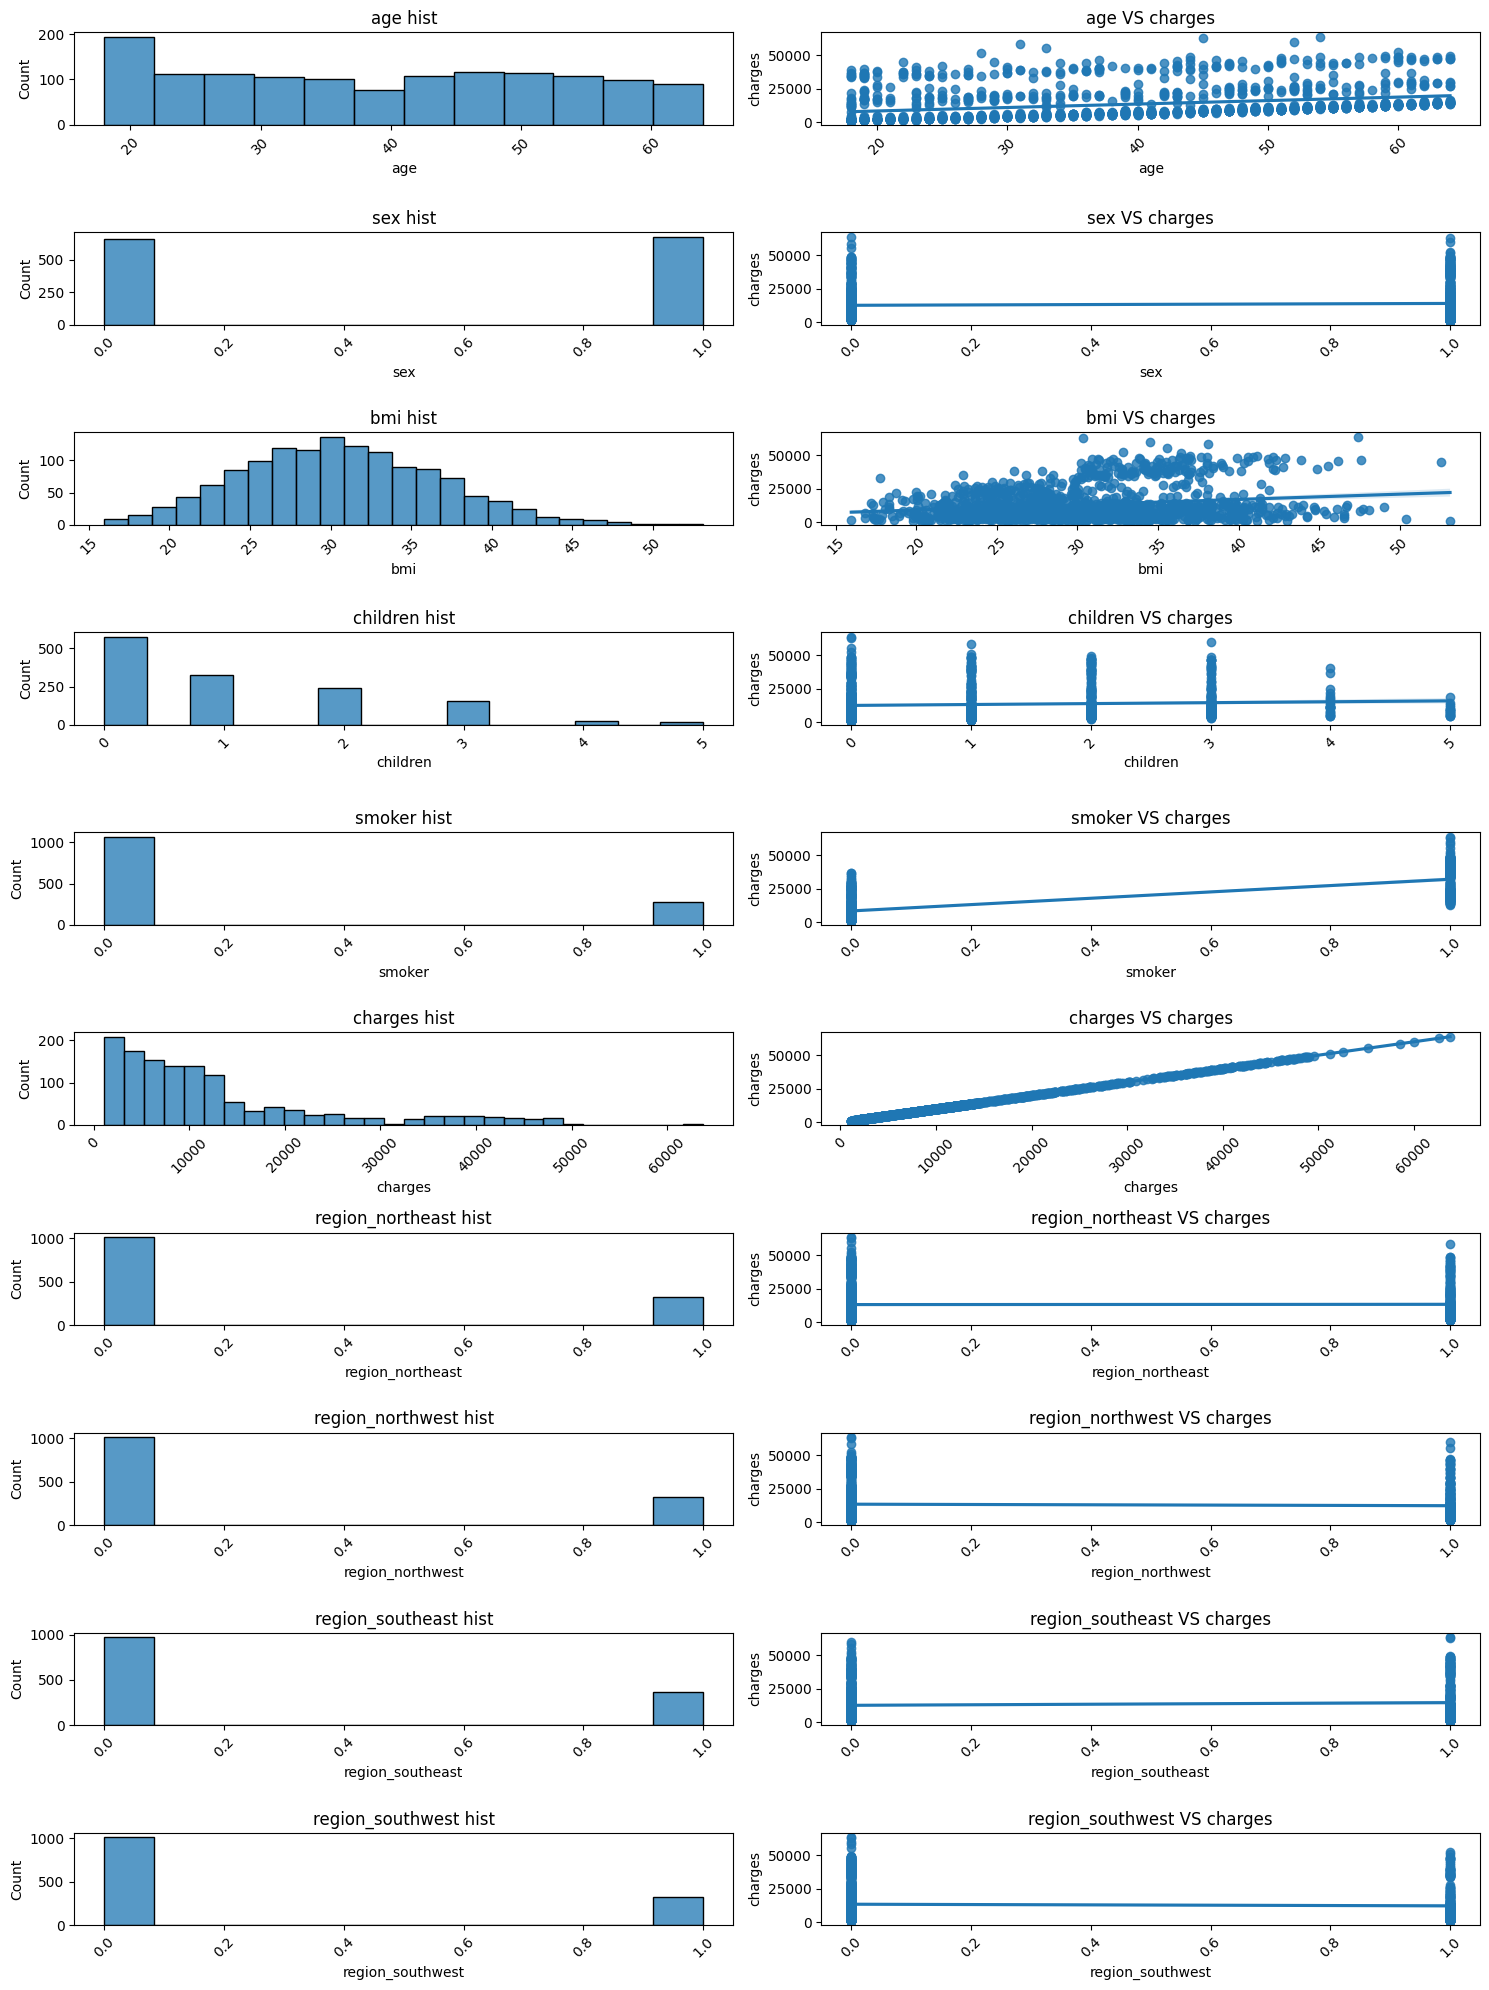

In [12]:
n = len(num_features) #количество числовых признаков
fig, axes = plt.subplots(n, 2, figsize=(15, 20)) # фигура + n х 2 координатных плоскостей
#Создаем цикл для всех признаков из списка числовых признаков
for i, feature in enumerate(num_features): #i- индекс, feature - название признака в таблице
    #Строим гистограмму распределения признака 
    histplot = sns.histplot(data=temp_data, x=feature, ax=axes[i][0])
    #Добавляем подпись графику
    histplot.set_title('{} hist'.format(feature))
    #Добавляем поворот отметок на оси абсцисс
    histplot.xaxis.set_tick_params(rotation=45)
    #Строим диаграмму рассеяния + линейную регрессию
    regplot = sns.regplot(data=temp_data, x=feature, y='charges', ax=axes[i][1])
    #Добавляем подпись графику
    regplot.set_title('{} VS charges'.format(feature));
    #Добавляем поворот отметок на оси абсцисс
    regplot.xaxis.set_tick_params(rotation=45)
plt.tight_layout() #выравнивание графиков

Итак, мы получили перекодированную таблицу, в которой все признаки являются числовыми.

Выделим факторы и целевой признак в отдельные таблицы:

In [13]:
features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']

#### Задание 6.1

Прежде чем переходить к этапу моделирования, нам необходимо позаботиться о создании выборки для тестирования модели.

Разделите набор данных на тренировочную и тестовую выборки в соотношении 80/20. Воспользуйтесь функцией train_test_split.

В качестве значения параметра random_state укажите число 42.

Чему равно количество наблюдений в тестовом наборе данных?

In [14]:
from sklearn.model_selection import train_test_split
#Разделяем выборку на тренировочную и тестовую в соотношении 70/30
#Устанавливаем random_state для воспроизводимости результатов 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Выводим результирующие размеры таблиц
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (1070, 9) (1070,)
Test: (268, 9) (268,)


#### Задание 6.2

Обучите модель линейной регрессии аналитическим методом (LinearRegression) на тренировочном наборе данных. Все параметры оставьте по умолчанию.

Чему равен свободный член (intercept) обученной модели? Ответ округлите до сотых.

In [20]:
#Создаём объект класса LinearRegression
lr_model = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
lr_model.fit(X_train, y_train)
 
print('w0: {}'.format((np.round(lr_model.intercept_, 2)))) #свободный член w0

y_train_predict = lr_model.predict(X_train)
y_test_predict = lr_model.predict(X_test)

w0: -12390.8


С помощью модели, полученной в предыдущем задании, сделайте предсказание на тренировочной и тестовой выборке. Рассчитайте следующие три метрики: R^2, MAE, MAPE. Не забудьте привести значение  к процентам.

Значение  округлите до трёх знаков после точки-разделителя, а значения  и  — до целого числа.

Чему равны значения метрик на тренировочной и тестовой выборках?


In [25]:
# Предсказание на тренировочном и тестовом наборе данных
y_train_predict = lr_model.predict(X_train)
y_test_predict = lr_model.predict(X_test)

#Рассчитываем тренировочный MAE
print('Train MAE: {:.0f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
#Рассчитываем тренировочный MAPE
print('Train MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
#Рассчитываем тренировочный коэффициент детерминации
print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))

print('\n')
#Рассчитываем тестовый MAE
print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
#Рассчитываем тестовый MAE
print('Test MAE: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
#Рассчитываем тестовый MAE
print('Test MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

Train MAE: 4208
Train MAPE: 42
Train R^2: 0.742


Test R^2: 0.784
Test MAE: 4181
Test MAPE: 47


In [46]:
# Создадим из этого функцию:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.0f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Test MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

#### Задание 6.4

Постройте диаграмму boxplot для визуализации ошибок модели линейной регрессии на тренировочной и тестовой выборках. В качестве ошибки возьмите разницу между истинным ответом и предсказанием:  (без модуля).

In [34]:
# Расчет ошибок (разница между истинным ответом и предсказанием)
train_errors = y_train - y_train_predict
test_errors = y_test - y_test_predict

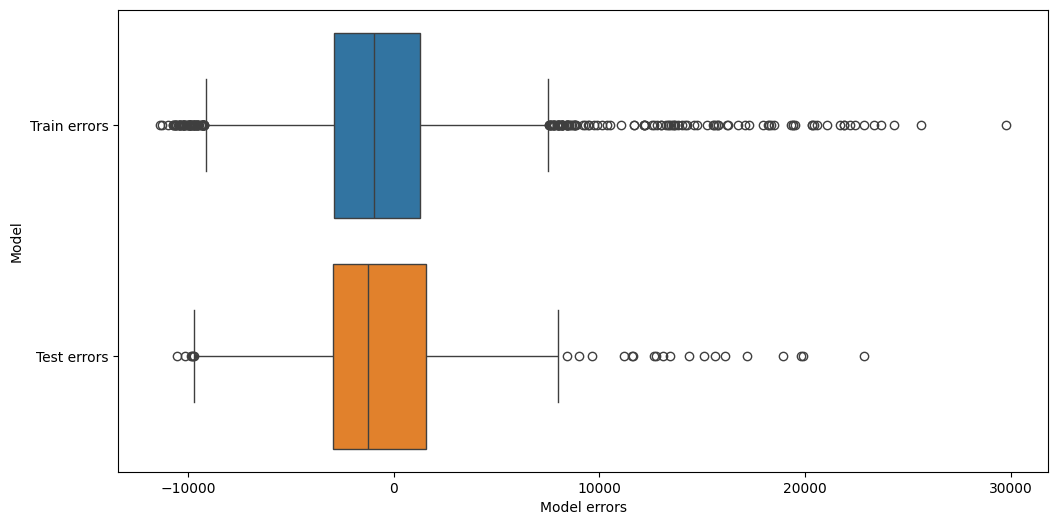

In [35]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура + координатная плоскость
#Ошибки модели на тренировочной выборке 
y_train_errors = y_train - lr_model.predict(X_train)
#Ошибки модели на тестовой выборке
y_test_errors = y_test - lr_model.predict(X_test)
#Для удобства визуализации составим DataFrame из ошибок
predict_df = pd.DataFrame(
    {'Train errors': y_train_errors, 
     'Test errors': y_test_errors
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=predict_df, orient='h', ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

#### Задание 6.5

Нормализуйте тренировочную и тестовую выборки с помощью min-max-нормализации (MinMaxScaler). Расчёт параметров нормализации (fit) произведите на тренировочной выборке.

Примечание. Min-max-нормализация не искажает изначальный вид бинарных категориальных признаков, в отличие от стандартизации.

На нормализованных данных сгенерируйте полиномиальные признаки степени 2. Воспользуйтесь классом PolynomialFeatures из библиотеки sklearn. Значение параметра include_bias выставите на False.

Чему равно результирующее количество столбцов?

In [39]:
# Создание объекта MinMaxScaler
scaler = preprocessing.MinMaxScaler()

# Расчет параметров нормализации на тренировочной выборке
scaler.fit(X_train)

# Нормализация тренировочной и тестовой выборок
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)
#Генерируем полиномиальные признаки для тренировочной выборки
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)
# Вывод результатов
print(X_train_scaled_poly.shape)


(1070, 54)


#### Задание 6.6

Обучите модель линейной регрессии на полиномиальных признаках.

Чему равно значение метрики R2 на тестовой выборке?

Значение R2 округлите до трёх знаков после запятой.

In [49]:
#Создаём объект класса LinearRegression
lr_model_poly = linear_model.LinearRegression()
#Обучаем модель по МНК
lr_model_poly.fit(X_train_scaled_poly, y_train)

#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lr_model_poly.predict(X_train_scaled_poly)

#Делаем предсказание для тестовой выборки
y_test_predict_poly = lr_model_poly.predict(X_test_scaled_poly)
 
#Рассчитываем коэффициент детерминации для теста
print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict_poly)))

Test R^2: 0.867


Задание 6.7

Выведите значения коэффициентов полученной модели. Посмотрите на степени коэффициентов.

Какой вывод можно сделать?

In [54]:
print(np.round(lr_model_poly.coef_, 3))

[ 6.92530175e+15 -9.58734184e+14  5.76139876e+14  3.01027366e+15
 -3.88511082e+14 -1.10582289e+16 -7.46388690e+16 -1.07985940e+16
 -4.40490502e+16  8.41500000e+03  7.63500000e+02  1.05350000e+03
 -1.62200000e+03  1.91000000e+02 -6.92530175e+15 -6.92530175e+15
 -6.92530175e+15 -6.92530175e+15  1.49001739e+16  5.96781000e+02
 -1.22909400e+03  2.80156000e+02 -1.39414397e+16 -1.39414397e+16
 -1.39414397e+16 -1.39414397e+16 -9.73842200e+03  1.59844500e+03
  5.48311480e+04 -5.76139876e+14 -5.76139876e+14 -5.76139876e+14
 -5.76139876e+14 -2.05600000e+03 -2.23200000e+03 -3.01027366e+15
 -3.01027366e+15 -3.01027366e+15 -3.01027366e+15  2.10321443e+15
 -1.71470334e+15 -1.71470334e+15 -1.71470334e+15 -1.71470334e+15
 -2.16831120e+16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.18975281e+16  0.00000000e+00  0.00000000e+00 -2.19427469e+16
  0.00000000e+00  1.13077093e+16]


#### Задание 6.8

Постройте линейную регрессию с L1-регуляризацией (Lasso) на полиномиальных признаках. В качестве параметра alpha используйте значение по умолчанию, параметр max_iter установите в значение 2000.

In [58]:
#Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(max_iter=2000)
#Обучаем модель
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)

#Рассчитываем тестовый MAE
print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict_poly)))
#Рассчитываем тестовый MAE
print('Test MAE: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_predict_poly)))
#Рассчитываем тестовый MAE
print('Test MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict_poly)*100))

Test R^2: 0.867
Test MAE: 2719
Test MAPE: 30


#### Задание 6.9

Постройте линейную регрессию с L2-регуляризацией на полиномиальных признаках. В качестве параметра alpha используйте значение по умолчанию.

In [59]:
#Создаём объект класса линейной регрессии с L2-регуляризацией
ridge_lr_poly = linear_model.Ridge()
#Обучаем модель
ridge_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = ridge_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = ridge_lr_poly.predict(X_test_scaled_poly)

In [60]:
#Рассчитываем тестовый MAE
print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict_poly)))
#Рассчитываем тестовый MAE
print('Test MAE: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_predict_poly)))
#Рассчитываем тестовый MAE
print('Test MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict_poly)*100))

Test R^2: 0.863
Test MAE: 2861
Test MAPE: 31
